In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [76]:
df = pd.read_csv(r'2015_2020_nowplaying.csv')
df

,Unnamed: 0,peak_date,release_date,song,artist,peak_rank,current_rank,last_rank,weeks_board,lyrics,...,spotify_explicit,days,np_tweets,np_volume,pre_tweets,pre_volume,title_sent,np_sent,pre_sent,lyrics_sent
0,0,2020-12-26,2020-12-11,Willow,Taylor Swift,1,1,NaN,1,[Verse 1] I'm like the water when your ship ro...,...,False,15,['WILLOW by TAYLOR SWIFT now playing on Bigman...,99,['RT @thebulletinham2: taylor swift is engaged...,89,0.0000,-0.9733,0.9993,0.9829
1,1,2020-12-26,2020-07-24,Mood,24kGoldn Featuring iann dior,1,5,2.0,19,"Why you always such a noob Walking round, acti...",...,True,155,['#nowplaying No Me Conoce (By lycans) by Jhay...,2,['RT @24kGoldn: 5 hours till mood 🥳 @ianndior ...,88,0.0000,-0.5267,-0.9992,0.9751
2,2,2020-12-26,2020-10-30,Positions,Ariana Grande,1,8,4.0,8,[Verse 1] Heaven sent you to me I'm just hopin...,...,True,57,['POSITIONS by ARIANA GRANDE now playing on Bi...,86,"['positions by Ariana Grande. yes.', 'RT @PopB...",76,0.0000,0.8398,0.6159,0.9935
3,3,2020-12-26,2020-11-20,Dynamite,BTS,1,9,24.0,17,"[Intro: Jung Kook] 'Cause I, I, I'm in the sta...",...,False,36,['Thank you @Rellaontheradio! #Dynamite by @BT...,91,['RT @BTS_graphs: Dynamite focused playlists w...,91,0.1779,0.9995,0.9995,0.9946
4,4,2020-12-26,2020-09-18,Holy,Justin Bieber Featuring Chance The Rapper,3,13,9.0,13,[Verse 1: Justin Bieber] I hear a lot about si...,...,False,99,['#nowplaying Holy - Justin Bieber feat. Chanc...,96,['RT @kidrauhlhive: Justin Bieber Ju...,88,0.0000,0.9996,0.9993,0.9863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,5010,2010-01-02,2009-12-15,Elevator,Eminem,67,67,NaN,1,"[Intro] All aboard! Okay, next stop, my baseme...",...,True,232,['i mean i haven’t heard eminem make an elevat...,12,['Currently playing: Coast 2 Coast Mixtape Vol...,99,0.0000,0.9321,0.9939,-0.9918
5011,5011,2010-01-02,2009-12-03,On Fire,Lil Wayne,62,84,62.0,2,"[Hook] Mama bad, mama mean Gasoline, she’s on ...",...,True,366,['RT @lilwaynehq_2: Check out @LilTunechi gift...,32,"[""RT @WavyNick: CHECKOUT NEW Gucci Mane ft. Li...",27,-0.3400,-0.9856,-0.9748,-0.9785
5012,5012,2010-01-02,2009-11-24,I Get It In,Omarion Featuring Gucci Mane,83,98,92.0,7,[Intro: Omarion & Gucci Mane] Oh! Omarion (It'...,...,True,39,['#nowplaying i get it in - omarion ft gucci m...,6,['Omarion - I Get It In (w/ Lil Wayne) - 05:58...,98,0.0000,0.4738,0.7379,-0.4019
5013,5013,2019-12-21,2019-05-13,We Were,Keith Urban,65,94,66.0,15,[Verse 1] We were just a couple years short of...,...,False,222,['KEITH URBAN - WE WERE https://t.co/Lt1u4581p...,11,['All I want for #MothersDay2019 is more @Keit...,30,0.0000,0.7580,0.8879,0.7851


In [77]:
weeks = df['weeks_board']
lyric_sent = df['lyrics_compound']
lyric_lab = []
for x in range(0, 5015, 1):
    val = df['lyrics_label'][x]
    if val == "pos":
        lyric_lab.append(1)
    elif val == "neg":
        lyric_lab.append(-1)
    elif val == "neu":
        lyric_lab.append(0)
lyric_ex = []
for x in range(0, 5015, 1):
    if str(df['spotify_explicit'][x]) == 'True':
        lyric_ex.append(1)
    elif str(df['spotify_explicit'][x]) == 'False':
        lyric_ex.append(0)
np_vol = df['np_volume']
np_sent = df['np_sent']
pre_vol = df['pre_volume']
pre_sent = df['pre_sent']
title_sent = df['title_sent']

# Top 10 

In [78]:
data = {'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
#data = {'id':id_, 'weeks':weeks, 'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
#       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
df_top10 = pd.DataFrame(data)
df_top10

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000
...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000


In [79]:
hit1 = []
for x in range(0, 5015, 1):
    ranking = df['peak_rank'][x]
    if ranking > 10:
        hit1.append(0)
    else:
        hit1.append(1)

In [80]:
df_top10['hit'] = hit1
df_top10

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent,hit
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000,1
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000,1
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000,1
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779,1
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000,1
...,...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000,0
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400,0
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000,0
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000,0


In [81]:
df_top10.hit.value_counts()

0    4421
1     594
Name: hit, dtype: int64

In [82]:
s0 = df_top10.hit[df_top10.hit.eq(1)].sample(594, random_state=5).index
s1 = df_top10.hit[df_top10.hit.eq(0)].sample(594, random_state=5).index
df_top10_split1 = df_top10.loc[s0.union(s1)]
df_top10_split1.hit.value_counts()

1    594
0    594
Name: hit, dtype: int64

In [83]:
HIT3 = df_top10_split1.hit

In [84]:
data = {'lyric_sent':df_top10_split1['lyric_sent'], 
        'lyric_lab':df_top10_split1['lyric_lab'], 'lyric_ex': df_top10_split1['lyric_ex'],
       'np_vol':df_top10_split1['np_vol'], 'np_sent':df_top10_split1['np_sent'], 'pre_vol':df_top10_split1['pre_vol'], 
        'pre_sent':df_top10_split1['pre_sent'], 'title_sent':df_top10_split1['title_sent']}
df_top10_split1_train = pd.DataFrame(data)

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Logistic Regression

In [86]:
x_train, x_test, y_train, y_test = train_test_split(df_top10_split1_train, HIT3, test_size=0.2, random_state=0)

logisticRegressor = LogisticRegression(max_iter=10000)

logisticRegressor.fit(x_train, y_train)

predictions = logisticRegressor.predict(x_test)
#matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))

#plt.figure(figsize=(8,8))
#sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
#plt.ylabel('Actual label'); #y label
#plt.xlabel('Predicted label'); #x label
#plt.title('Confusion matrix to show predicted labels against actual labels'); #title

score = logisticRegressor.score(x_test, y_test)
print(score)

              precision    recall  f1-score   support

           0       0.65      0.55      0.60       113
           1       0.64      0.74      0.69       125

    accuracy                           0.65       238
   macro avg       0.65      0.64      0.64       238
weighted avg       0.65      0.65      0.64       238

0.6470588235294118


In [87]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
print(grid)
lr = LogisticRegression(max_iter=10000)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

clf.fit(x_train, y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
Best: 0.684912 using {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}


              precision    recall  f1-score   support

           0       0.76      0.52      0.61       120
           1       0.63      0.83      0.72       118

    accuracy                           0.67       238
   macro avg       0.69      0.67      0.66       238
weighted avg       0.69      0.67      0.66       238

0.6722689075630253


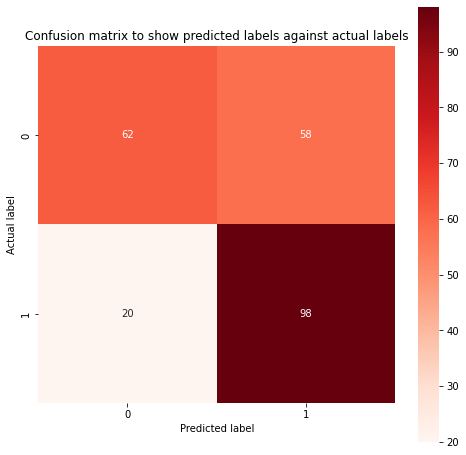

In [88]:
x_train, x_test, y_train, y_test = train_test_split(df_top10_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(solver='sag', penalty = 'l2', C=0.01, max_iter=10000)

logisticRegressor.fit(x_train, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))

plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title

score = logisticRegressor.score(x_test, y_test)
print(score)

## SVM

              precision    recall  f1-score   support

           0       0.76      0.52      0.61       120
           1       0.63      0.83      0.72       118

    accuracy                           0.67       238
   macro avg       0.69      0.67      0.66       238
weighted avg       0.69      0.67      0.66       238

0.6554621848739496


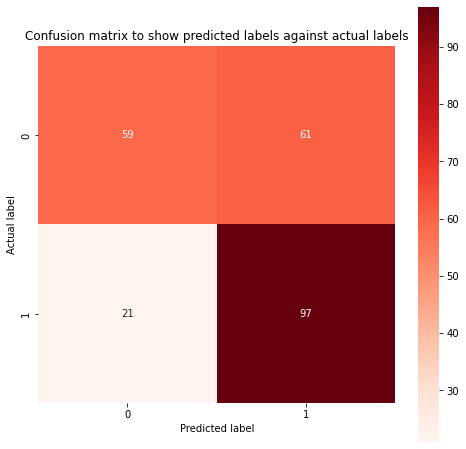

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(df_top10_split1_train, HIT3, test_size=0.2, random_state=1)

classifier = svm.SVC() #create classifier
classifier.fit(X_train, Y_train) 

predicted = classifier.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(y_test,predictions))

plt.figure(figsize=(8,8))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix to show predicted labels against actual labels');

score = classifier.score(x_test, y_test) #get score
print(score)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

c_values = [10, 1.0, 0.1, 0.01]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
classifier = svm.SVC()
# define grid search
grid = dict(kernel=kernel, C=c_values)
print(grid)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
classifier = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

classifier.fit(X_train, Y_train)

print("Best: %f using %s" % (classifier.best_score_, classifier.best_params_))

              precision    recall  f1-score   support

           0       0.76      0.52      0.61       120
           1       0.63      0.83      0.72       118

    accuracy                           0.67       238
   macro avg       0.69      0.67      0.66       238
weighted avg       0.69      0.67      0.66       238

0.6722689075630253


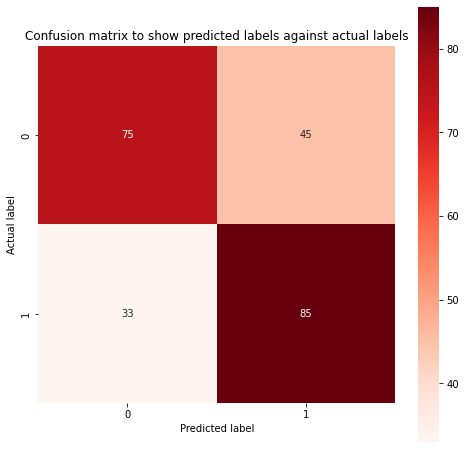

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(df_top10_split1_train, HIT3, test_size=0.2, random_state=1)

classifier = svm.SVC(kernel = 'poly', C=0.01) #create classifier
classifier.fit(X_train, Y_train) 

predicted = classifier.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(y_test,predictions))

plt.figure(figsize=(8,8))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix to show predicted labels against actual labels');

score = classifier.score(x_test, y_test) #get score
print(score)

## Random Forest

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       120
           1       0.64      0.75      0.69       118

    accuracy                           0.66       238
   macro avg       0.67      0.66      0.66       238
weighted avg       0.67      0.66      0.66       238

0.6638655462184874


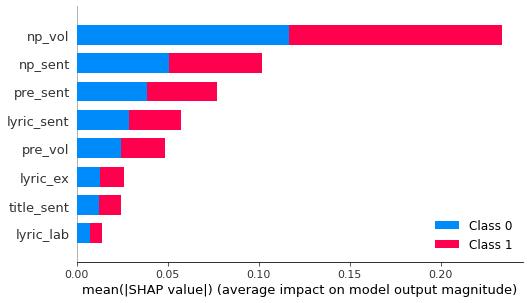

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_top10_split1_train, HIT3, test_size=0.20, random_state=1)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

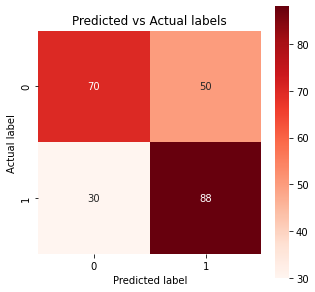

In [92]:
plt.figure(figsize=(5,5))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Predicted vs Actual labels');

In [94]:
# define models and parameters
n_estimators = [10, 40, 80, 100]
criterion = ['gini', 'entropy']
max_depth = [5, 8, 10]

# define grid search
grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
print(grid)
clf=RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

clf.fit(X_train,y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

{'n_estimators': [10, 40, 80, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 8, 10]}
Best: 0.664912 using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}


              precision    recall  f1-score   support

           0       0.80      0.65      0.72       120
           1       0.70      0.84      0.76       118

    accuracy                           0.74       238
   macro avg       0.75      0.74      0.74       238
weighted avg       0.75      0.74      0.74       238

0.7436974789915967


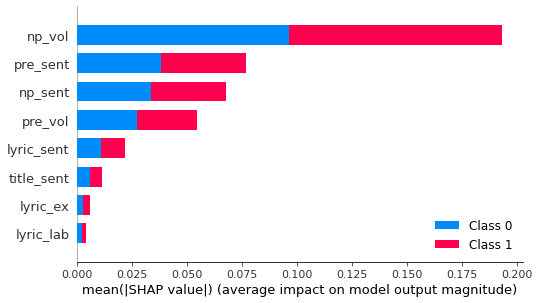

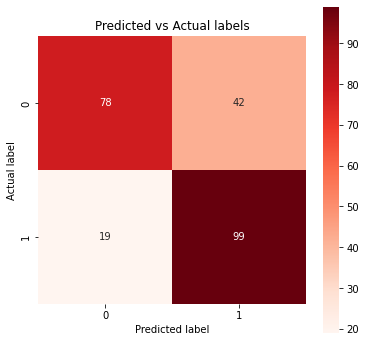

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df_top10_split1_train, HIT3, test_size=0.20, random_state=1)

clf=RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=5, random_state=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

plt.figure(figsize=(6,6))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Predicted vs Actual labels');

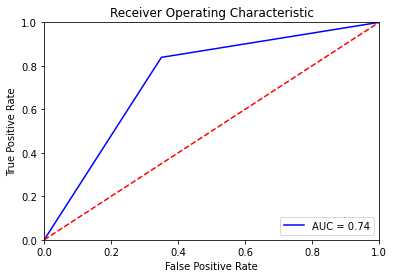

In [96]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Top 20

In [20]:
data = {'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
#data = {'id':id_, 'weeks':weeks, 'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
#       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
df_top20 = pd.DataFrame(data)
df_top20

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000
...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000


In [21]:
hit1 = []
for x in range(0, 5015, 1):
    ranking = df['peak_rank'][x]
    if ranking > 20:
        hit1.append(0)
    else:
        hit1.append(1)

In [22]:
df_top20['hit'] = hit1
df_top20

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent,hit
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000,1
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000,1
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000,1
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779,1
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000,1
...,...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000,0
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400,0
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000,0
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000,0


In [23]:
df_top20.hit.value_counts()

0    3976
1    1039
Name: hit, dtype: int64

In [24]:
s0 = df_top20.hit[df_top20.hit.eq(1)].sample(1039, random_state=5).index
s1 = df_top20.hit[df_top20.hit.eq(0)].sample(1039, random_state=5).index
df_top20_split1 = df_top20.loc[s0.union(s1)]
df_top20_split1.hit.value_counts()

1    1039
0    1039
Name: hit, dtype: int64

In [25]:
HIT3 = df_top20_split1.hit

In [26]:
data = {'lyric_sent':df_top20_split1['lyric_sent'], 
        'lyric_lab':df_top20_split1['lyric_lab'], 'lyric_ex': df_top20_split1['lyric_ex'],
       'np_vol':df_top20_split1['np_vol'], 'np_sent':df_top20_split1['np_sent'], 'pre_vol':df_top20_split1['pre_vol'], 
        'pre_sent':df_top20_split1['pre_sent'], 'title_sent':df_top20_split1['title_sent']}
df_top20_split1_train = pd.DataFrame(data)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       198
           1       0.64      0.73      0.68       218

    accuracy                           0.64       416
   macro avg       0.64      0.64      0.64       416
weighted avg       0.64      0.64      0.64       416

0.6418269230769231


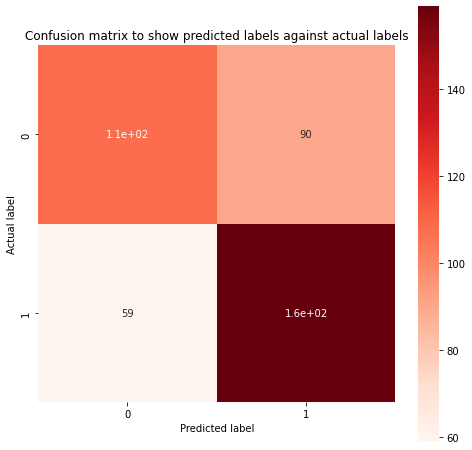

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_top20_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(solver='sag', penalty='l2', C=0.01, max_iter=10000)
logisticRegressor.fit(x_train, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title


## SVM

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       198
           1       0.68      0.62      0.65       218

    accuracy                           0.65       416
   macro avg       0.65      0.65      0.65       416
weighted avg       0.65      0.65      0.65       416

0.6466346153846154


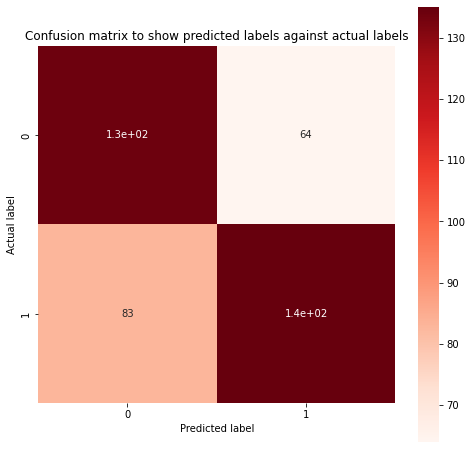

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(df_top20_split1_train, HIT3, test_size=0.2, random_state=1)

classifier = svm.SVC(kernel='poly', C=0.01) #create classifier
classifier.fit(X_train, Y_train) 

predicted = classifier.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(Y_test,predicted))
print(accuracy_score(Y_test, predicted))
plt.figure(figsize=(8,8))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix to show predicted labels against actual labels');


## Random Forest

              precision    recall  f1-score   support

           0       0.60      0.62      0.61       198
           1       0.64      0.62      0.63       218

    accuracy                           0.62       416
   macro avg       0.62      0.62      0.62       416
weighted avg       0.62      0.62      0.62       416

0.6201923076923077


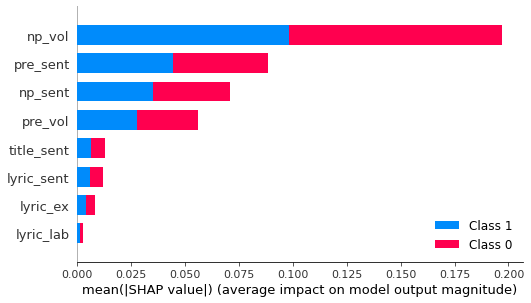

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_top20_split1_train, HIT3, test_size=0.20, random_state=1)

clf=RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=5, random_state=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Top 5

In [30]:
data = {'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
#data = {'id':id_, 'weeks':weeks, 'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
#       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
df_top5 = pd.DataFrame(data)
df_top5

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000
...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000


In [31]:
hit1 = []
for x in range(0, 5015, 1):
    ranking = df['peak_rank'][x]
    if ranking > 5:
        hit1.append(0)
    else:
        hit1.append(1)

In [32]:
df_top5['hit'] = hit1
df_top5

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent,hit
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000,1
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000,1
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000,1
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779,1
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000,1
...,...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000,0
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400,0
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000,0
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000,0


In [33]:
df_top5.hit.value_counts()

0    4660
1     355
Name: hit, dtype: int64

In [34]:
s0 = df_top5.hit[df_top5.hit.eq(1)].sample(355, random_state=5).index
s1 = df_top5.hit[df_top5.hit.eq(0)].sample(355, random_state=5).index
df_top5_split1 = df_top5.loc[s0.union(s1)]
df_top5_split1.hit.value_counts()

1    355
0    355
Name: hit, dtype: int64

In [35]:
HIT3 = df_top5_split1.hit

In [36]:
data = {'lyric_sent':df_top5_split1['lyric_sent'], 
        'lyric_lab':df_top5_split1['lyric_lab'], 'lyric_ex': df_top5_split1['lyric_ex'],
       'np_vol':df_top5_split1['np_vol'], 'np_sent':df_top5_split1['np_sent'], 'pre_vol':df_top5_split1['pre_vol'], 
        'pre_sent':df_top5_split1['pre_sent'], 'title_sent':df_top5_split1['title_sent']}
df_top5_split1_train = pd.DataFrame(data)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        65
           1       0.69      0.75      0.72        77

    accuracy                           0.68       142
   macro avg       0.68      0.68      0.68       142
weighted avg       0.68      0.68      0.68       142

0.6830985915492958


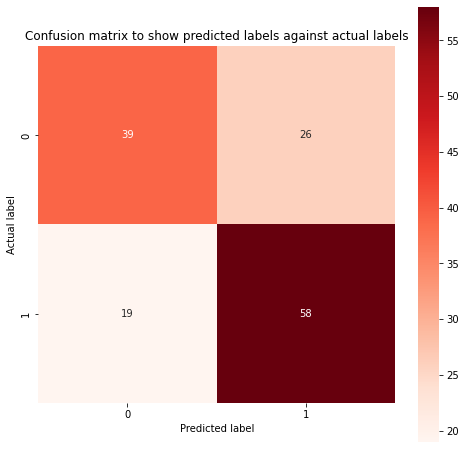

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_top5_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(solver='sag', penalty='l2', C=0.01, max_iter=10000)
logisticRegressor.fit(x_train, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title


## SVM

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        65
           1       0.67      0.66      0.67        77

    accuracy                           0.64       142
   macro avg       0.64      0.64      0.64       142
weighted avg       0.64      0.64      0.64       142

0.6408450704225352


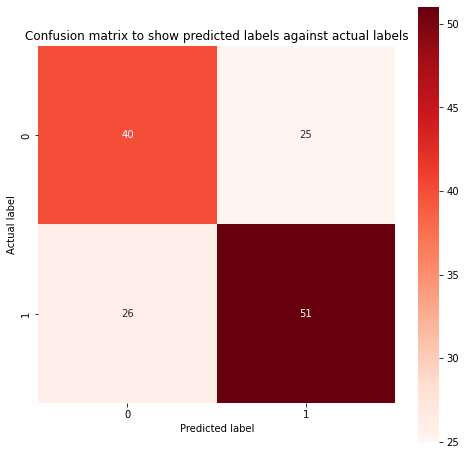

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df_top5_split1_train, HIT3, test_size=0.2, random_state=1)

classifier = svm.SVC(kernel='poly', C=0.01) #create classifier
classifier.fit(X_train, Y_train) 

predicted = classifier.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(y_test,predicted))
print(accuracy_score(y_test, predicted))

plt.figure(figsize=(8,8))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix to show predicted labels against actual labels');


## Random Forest

              precision    recall  f1-score   support

           0       0.63      0.65      0.64        65
           1       0.69      0.68      0.68        77

    accuracy                           0.66       142
   macro avg       0.66      0.66      0.66       142
weighted avg       0.66      0.66      0.66       142

0.6619718309859155


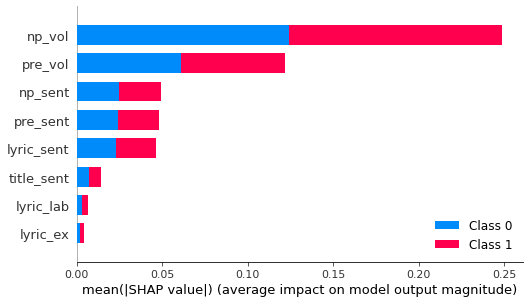

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_top5_split1_train, HIT3, test_size=0.2, random_state=1)

clf=RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=5, random_state=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Spotify > 75

In [97]:
data = {'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
df_spot75 = pd.DataFrame(data)
df_spot75

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000
...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000


In [98]:
hit1 = []
for x in range(0, 5015, 1):
    ranking = df['spotify_pop'][x]
    if ranking < 75:
        hit1.append(0)
    else:
        hit1.append(1)

In [99]:
df_spot75['hit'] = hit1
df_spot75

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent,hit
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000,1
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000,1
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000,1
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779,1
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000,1
...,...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000,0
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400,0
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000,0
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000,0


In [100]:
df_spot75.hit.value_counts()

0    4112
1     903
Name: hit, dtype: int64

In [101]:
s0 = df_spot75.hit[df_spot75.hit.eq(1)].sample(900, random_state=5).index
s1 = df_spot75.hit[df_spot75.hit.eq(0)].sample(900, random_state=5).index
df_spot75_split1 = df_spot75.loc[s0.union(s1)]
df_spot75_split1.hit.value_counts()

1    900
0    900
Name: hit, dtype: int64

In [102]:
HIT3 = df_spot75_split1.hit

In [103]:
data = {'lyric_sent':df_spot75_split1['lyric_sent'], 
        'lyric_lab':df_spot75_split1['lyric_lab'], 'lyric_ex': df_spot75_split1['lyric_ex'],
       'np_vol':df_spot75_split1['np_vol'], 'np_sent':df_spot75_split1['np_sent'], 'pre_vol':df_spot75_split1['pre_vol'], 
        'pre_sent':df_spot75_split1['pre_sent'], 'title_sent':df_spot75_split1['title_sent']}
df_spot75_split1_train = pd.DataFrame(data)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       191
           1       0.56      0.67      0.61       169

    accuracy                           0.60       360
   macro avg       0.60      0.60      0.60       360
weighted avg       0.61      0.60      0.60       360

0.6


X has feature names, but LogisticRegression was fitted without feature names


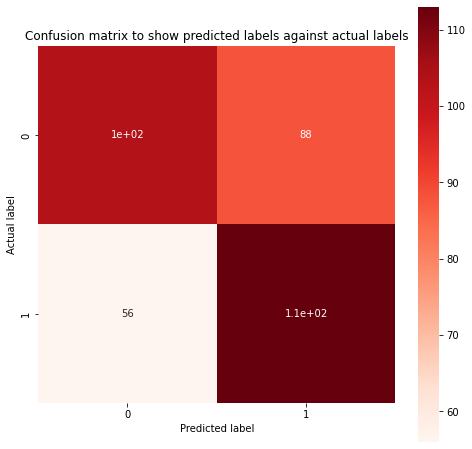

In [104]:
x_train, x_test, y_train, y_test = train_test_split(df_spot75_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(max_iter=10000)
logisticRegressor.fit(x_train.values, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title


In [105]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
print(grid)
lr = LogisticRegression(max_iter=10000)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
clf = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

clf.fit(x_train, y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
Best: 0.589120 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.65      0.55      0.59       191
           1       0.57      0.66      0.61       169

    accuracy                           0.60       360
   macro avg       0.61      0.61      0.60       360
weighted avg       0.61      0.60      0.60       360

0.6027777777777777


X has feature names, but LogisticRegression was fitted without feature names


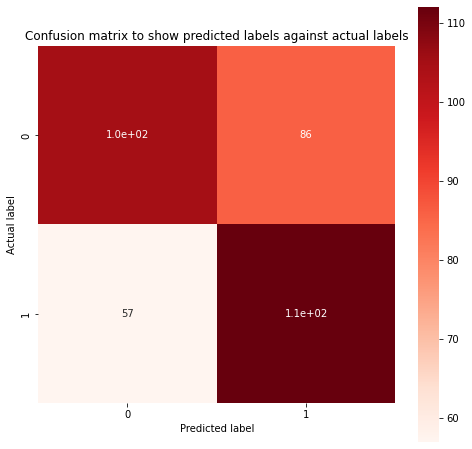

In [106]:
x_train, x_test, y_train, y_test = train_test_split(df_spot75_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C=0.01, max_iter=10000)
logisticRegressor.fit(x_train.values, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title


## SVM

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       191
           1       0.58      0.52      0.55       169

    accuracy                           0.59       360
   macro avg       0.59      0.59      0.59       360
weighted avg       0.59      0.59      0.59       360

0.5944444444444444


X has feature names, but SVC was fitted without feature names


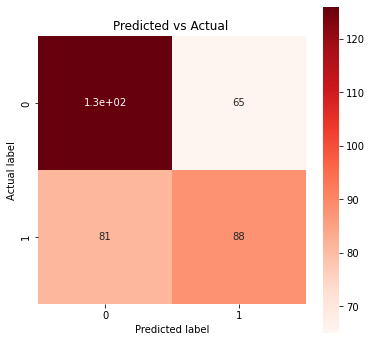

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(df_spot75_split1_train, HIT3, test_size=0.2, random_state=1)
from sklearn import svm
svm = svm.SVC(kernel='poly', C=0.01) #create classifier
svm.fit(X_train.values, Y_train) 

predicted = svm.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(Y_test,predicted))
print (accuracy_score(Y_test,predicted))
plt.figure(figsize=(6,6))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Predicted vs Actual ');


## Random Forest

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       191
           1       0.58      0.63      0.60       169

    accuracy                           0.61       360
   macro avg       0.61      0.61      0.61       360
weighted avg       0.61      0.61      0.61       360

0.6083333333333333


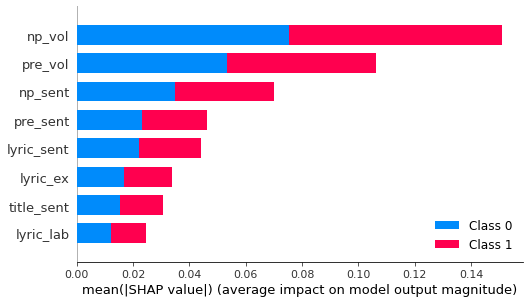

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_spot75_split1_train, HIT3, test_size=0.2, random_state=1)

clf=RandomForestClassifier(n_estimators=100, random_state = 10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [109]:
# define models and parameters
n_estimators = [10, 40, 80, 100]
criterion = ['gini', 'entropy']
max_depth = [5, 8, 10]

# define grid search
grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
print(grid)
clf=RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

clf.fit(X_train,y_train)

print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

{'n_estimators': [10, 40, 80, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 8, 10]}
Best: 0.595139 using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}


              precision    recall  f1-score   support

           0       0.67      0.64      0.65       191
           1       0.61      0.64      0.63       169

    accuracy                           0.64       360
   macro avg       0.64      0.64      0.64       360
weighted avg       0.64      0.64      0.64       360

0.6416666666666667


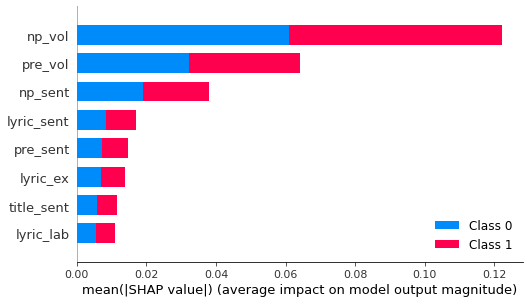

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_spot75_split1_train, HIT3, test_size=0.2, random_state=1)

clf=RandomForestClassifier(n_estimators=80, criterion='gini', max_depth=5, random_state=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

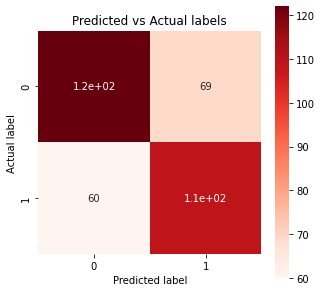

In [114]:
plt.figure(figsize=(5,5))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Predicted vs Actual labels');

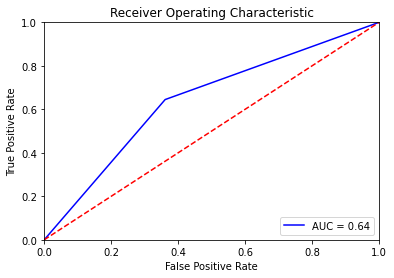

In [113]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Spotify > 80

In [54]:
data = {'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
df_spot80 = pd.DataFrame(data)
df_spot80

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000
...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000


In [55]:
hit1 = []
for x in range(0, 5015, 1):
    ranking = df['spotify_pop'][x]
    if ranking < 80:
        hit1.append(0)
    else:
        hit1.append(1)

In [56]:
df_spot80['hit'] = hit1
df_spot80

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent,hit
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000,1
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000,1
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000,1
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779,1
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000,1
...,...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000,0
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400,0
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000,0
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000,0


In [57]:
df_spot80.hit.value_counts()

0    4645
1     370
Name: hit, dtype: int64

In [58]:
s0 = df_spot80.hit[df_spot80.hit.eq(1)].sample(370, random_state=5).index
s1 = df_spot80.hit[df_spot80.hit.eq(0)].sample(370, random_state=5).index
df_spot80_split1 = df_spot80.loc[s0.union(s1)]
df_spot80_split1.hit.value_counts()

1    370
0    370
Name: hit, dtype: int64

In [59]:
HIT3 = df_spot80_split1.hit

In [60]:
data = {'lyric_sent':df_spot80_split1['lyric_sent'], 
        'lyric_lab':df_spot80_split1['lyric_lab'], 'lyric_ex': df_spot80_split1['lyric_ex'],
       'np_vol':df_spot80_split1['np_vol'], 'np_sent':df_spot80_split1['np_sent'], 'pre_vol':df_spot80_split1['pre_vol'], 
        'pre_sent':df_spot80_split1['pre_sent'], 'title_sent':df_spot80_split1['title_sent']}
df_spot80_split1_train = pd.DataFrame(data)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.63      0.40      0.49        78
           1       0.53      0.74      0.62        70

    accuracy                           0.56       148
   macro avg       0.58      0.57      0.55       148
weighted avg       0.58      0.56      0.55       148

0.5608108108108109


X has feature names, but LogisticRegression was fitted without feature names


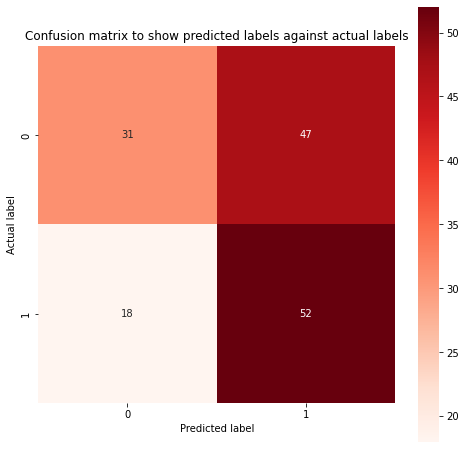

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_spot80_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C=0.01, max_iter=10000)
logisticRegressor.fit(x_train.values, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title


## SVM

X has feature names, but SVC was fitted without feature names


              precision    recall  f1-score   support

           0       0.57      0.59      0.58        78
           1       0.52      0.50      0.51        70

    accuracy                           0.55       148
   macro avg       0.55      0.54      0.54       148
weighted avg       0.55      0.55      0.55       148

0.5472972972972973


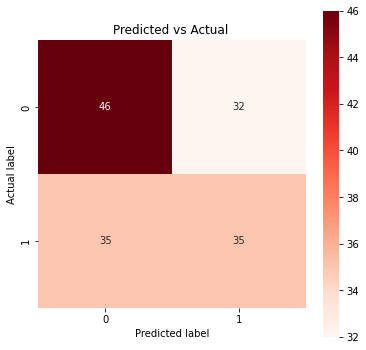

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(df_spot80_split1_train, HIT3, test_size=0.2, random_state=1)
from sklearn import svm
svm = svm.SVC(kernel='poly', C=0.01) #create classifier
svm.fit(X_train.values, Y_train) 

predicted = svm.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(Y_test,predicted))
print(accuracy_score(Y_test, predicted))

plt.figure(figsize=(6,6))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Predicted vs Actual ');

## Random Forest

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        78
           1       0.54      0.73      0.62        70

    accuracy                           0.57       148
   macro avg       0.59      0.58      0.57       148
weighted avg       0.59      0.57      0.57       148

0.5743243243243243


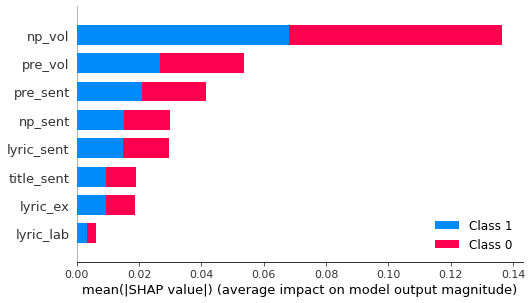

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df_spot80_split1_train, HIT3, test_size=0.2, random_state=1)

clf=RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=5, random_state=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Spotify > 70

In [64]:
data = {'lyric_sent':lyric_sent, 'lyric_lab':lyric_lab, 'lyric_ex': lyric_ex,
       'np_vol':np_vol, 'np_sent':np_sent, 'pre_vol':pre_vol, 'pre_sent':pre_sent, 'title_sent':title_sent}
df_spot70 = pd.DataFrame(data)
df_spot70

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000
...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000


In [65]:
hit1 = []
for x in range(0, 5015, 1):
    ranking = df['spotify_pop'][x]
    if ranking < 70:
        hit1.append(0)
    else:
        hit1.append(1)

In [66]:
df_spot70['hit'] = hit1
df_spot70

,lyric_sent,lyric_lab,lyric_ex,np_vol,np_sent,pre_vol,pre_sent,title_sent,hit
0,0.9829,1,0,99,-0.9733,89,0.9993,0.0000,1
1,0.9751,1,1,2,-0.5267,88,-0.9992,0.0000,1
2,0.9935,1,1,86,0.8398,76,0.6159,0.0000,1
3,0.9946,1,0,91,0.9995,91,0.9995,0.1779,1
4,0.9863,1,0,96,0.9996,88,0.9993,0.0000,1
...,...,...,...,...,...,...,...,...,...
5010,-0.9918,-1,1,12,0.9321,99,0.9939,0.0000,0
5011,-0.9785,-1,1,32,-0.9856,27,-0.9748,-0.3400,0
5012,-0.4019,-1,1,6,0.4738,98,0.7379,0.0000,0
5013,0.7851,1,0,11,0.7580,30,0.8879,0.0000,0


In [67]:
df_spot70.hit.value_counts()

0    3407
1    1608
Name: hit, dtype: int64

In [68]:
s0 = df_spot70.hit[df_spot70.hit.eq(1)].sample(1600, random_state=5).index
s1 = df_spot70.hit[df_spot70.hit.eq(0)].sample(1600, random_state=5).index
df_spot70_split1 = df_spot70.loc[s0.union(s1)]
df_spot70_split1.hit.value_counts()

1    1600
0    1600
Name: hit, dtype: int64

In [69]:
HIT3 = df_spot70_split1.hit

In [70]:
data = {'lyric_sent':df_spot70_split1['lyric_sent'], 
        'lyric_lab':df_spot70_split1['lyric_lab'], 'lyric_ex': df_spot70_split1['lyric_ex'],
       'np_vol':df_spot70_split1['np_vol'], 'np_sent':df_spot70_split1['np_sent'], 'pre_vol':df_spot70_split1['pre_vol'], 
        'pre_sent':df_spot70_split1['pre_sent'], 'title_sent':df_spot70_split1['title_sent']}
df_spot70_split1_train = pd.DataFrame(data)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       306
           1       0.62      0.65      0.64       334

    accuracy                           0.61       640
   macro avg       0.61      0.61      0.61       640
weighted avg       0.61      0.61      0.61       640

0.6109375


X has feature names, but LogisticRegression was fitted without feature names
X has feature names, but LogisticRegression was fitted without feature names


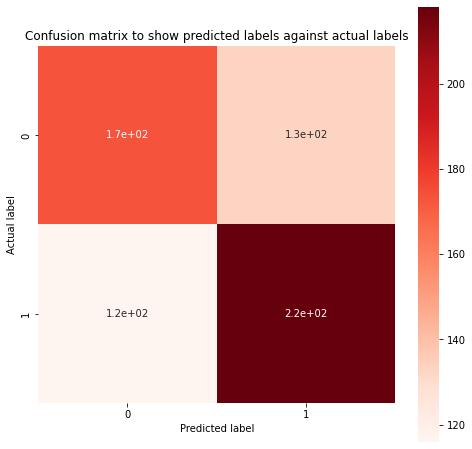

In [71]:
x_train, x_test, y_train, y_test = train_test_split(df_spot70_split1_train, HIT3, test_size=0.2, random_state=1)

logisticRegressor = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C=0.01, max_iter=10000)
logisticRegressor.fit(x_train.values, y_train)

predictions = logisticRegressor.predict(x_test)
matrix = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))

plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label'); #y label
plt.xlabel('Predicted label'); #x label
plt.title('Confusion matrix to show predicted labels against actual labels'); #title

score = logisticRegressor.score(x_test, y_test)
print(score)

## SVM

X has feature names, but SVC was fitted without feature names


              precision    recall  f1-score   support

           0       0.55      0.67      0.60       306
           1       0.62      0.49      0.55       334

    accuracy                           0.58       640
   macro avg       0.58      0.58      0.57       640
weighted avg       0.58      0.58      0.57       640

0.5765625


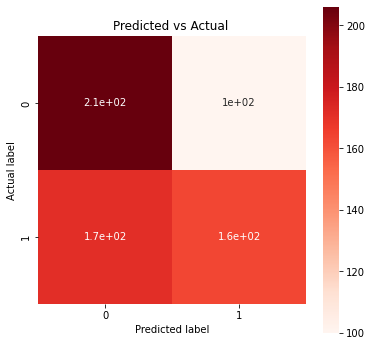

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(df_spot70_split1_train, HIT3, test_size=0.2, random_state=1)
from sklearn import svm
svm = svm.SVC(kernel='poly', C=0.01) #create classifier
svm.fit(X_train.values, Y_train) 

predicted = svm.predict(X_test)
matrix = metrics.confusion_matrix(Y_test, predicted)
print(classification_report(Y_test,predicted))
print (accuracy_score(Y_test, predicted))

plt.figure(figsize=(6,6))
#uses the confusion matrix to create a heatmap
sns.heatmap(matrix, annot=True, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Predicted vs Actual ');

## Random Forest

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.63      0.64      0.64       334

    accuracy                           0.62       640
   macro avg       0.61      0.61      0.61       640
weighted avg       0.62      0.62      0.62       640

0.615625


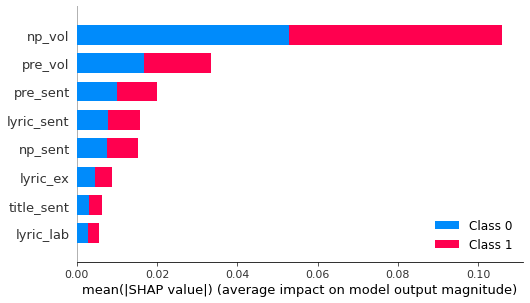

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_spot70_split1_train, HIT3, test_size=0.20, random_state=1)

clf=RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=5, random_state=10)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)